In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import pickle

infile = open('/content/drive/My Drive/Colab Notebooks/RML2016.10a_dict.pkl','rb')
raw_data = pickle.load(infile,encoding = 'latin1')
infile.close()

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], raw_data.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(raw_data[(mod,snr)])
        for i in range(raw_data[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
X = np.reshape(X,(-1,256))


In [ ]:
from sklearn.preprocessing import OneHotEncoder

lbl_mods = np.array([[label[0] for label in lbl]])
lbl_mods = lbl_mods.transpose()
lbl_snr = [label[1] for label in lbl]

enc_lbl_mods = OneHotEncoder(handle_unknown='ignore')
enc_lbl_mods = enc_lbl_mods.fit_transform(lbl_mods)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, enc_lbl_mods.toarray(), test_size=0.25, random_state=2016)


In [ ]:
from keras import models
from keras.layers import Dense, Activation, Reshape,Flatten,Conv2D
from keras.layers.convolutional_recurrent import ConvLSTM2D

model = models.Sequential()
model.add(Reshape((2,128,1),input_shape= (256,)))
model.add(Conv2D(filters = 64, kernel_size =2, border_mode='valid', activation="relu", name="conv1", init='glorot_uniform'))
model.add(Flatten())
model.add(Dense(256, activation='relu', init='he_normal'))
model.add(Dense(64, activation='relu', init='he_normal'))
model.add(Dense( 11, init='he_normal',  ))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

#add dropout layers
#batch normalisation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=2, activation="relu", name="conv1", padding="valid", kernel_initializer="glorot_uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="he_normal")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="he_normal")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, kernel_initializer="he_normal")`
  # This is added back by InteractiveShellApp.init_path()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 1, 127, 64)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 8128)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2081024   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 11)                715       
_________________________________________________________________
activation_2 (Activation)    (None, 11)               

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

NameError: ignored

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


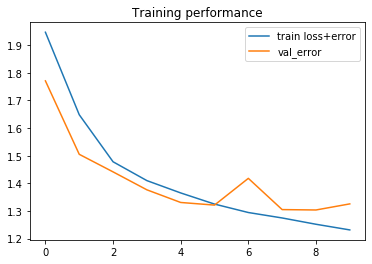

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

plt.savefig("fig.eps")


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

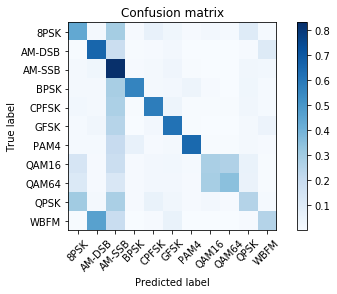

In [ ]:
test_Y_hat = model.predict(X_test)
conf = np.zeros([len(mods),len(mods)])
confnorm = np.zeros([len(mods),len(mods)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(mods)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=mods)

plt.savefig('mods.eps')

In [ ]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(range(X.shape[0]), range(X.shape[0]), test_size=0.25, random_state=2016)

Overall Accuracy:  0.09376140094855892
Overall Accuracy:  0.10445580715850986
Overall Accuracy:  0.09235784136182543
Overall Accuracy:  0.10971089696071164
Overall Accuracy:  0.1321455085374907
Overall Accuracy:  0.19606358819076458
Overall Accuracy:  0.2860705379408621
Overall Accuracy:  0.40309506263817246
Overall Accuracy:  0.513255567338282
Overall Accuracy:  0.6249546608632571
Overall Accuracy:  0.6752228163992869
Overall Accuracy:  0.7219232149264442
Overall Accuracy:  0.7425742574257426
Overall Accuracy:  0.7318148420279207
Overall Accuracy:  0.7396471011883328
Overall Accuracy:  0.7463327370304115
Overall Accuracy:  0.7542898868200073
Overall Accuracy:  0.7447804175665946
Overall Accuracy:  0.7426223384385506
Overall Accuracy:  0.7421615639985245


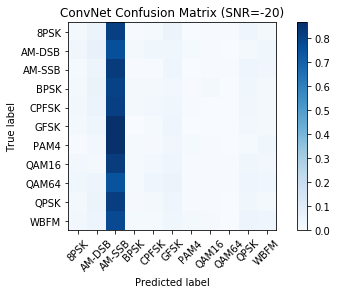

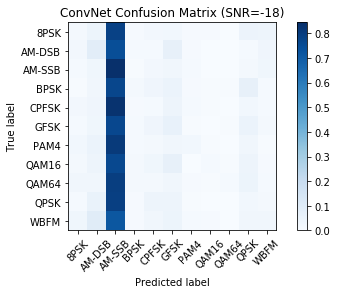

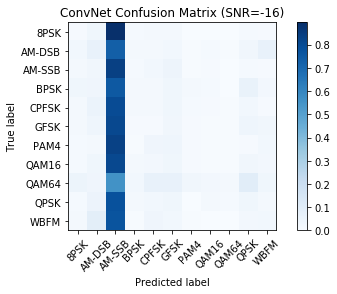

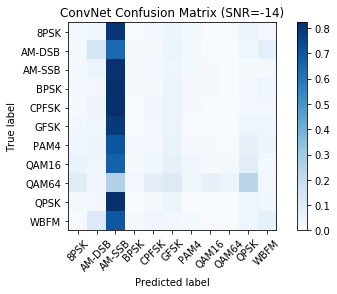

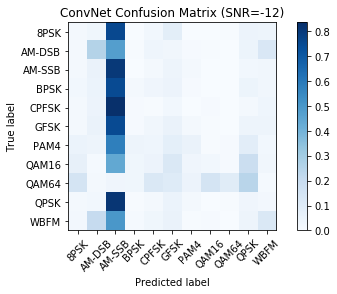

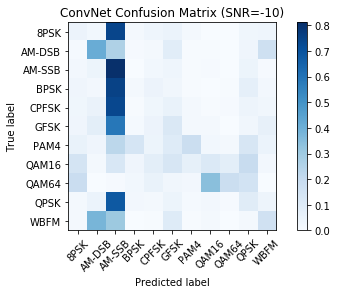

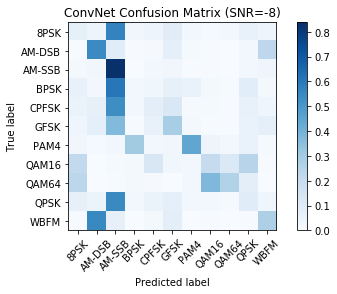

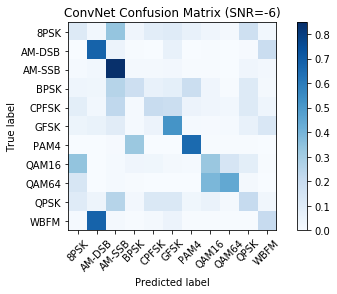

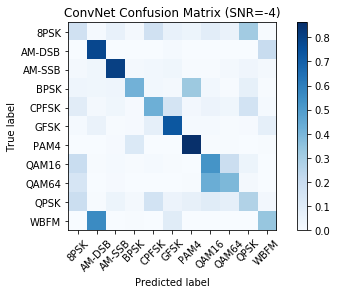

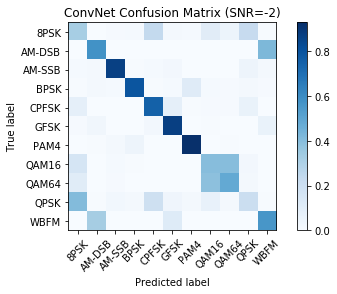

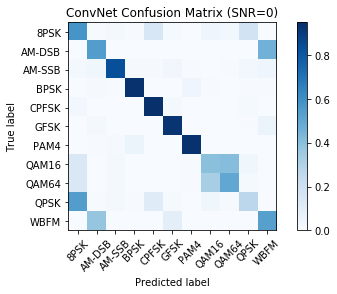

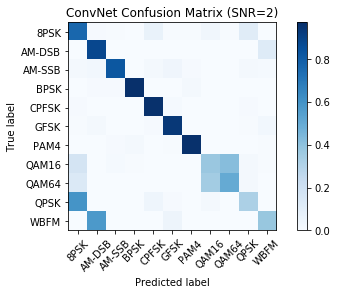

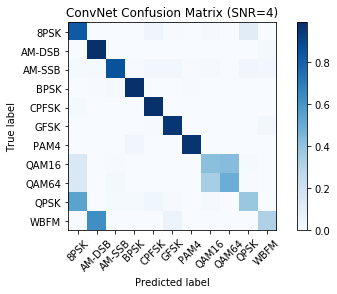

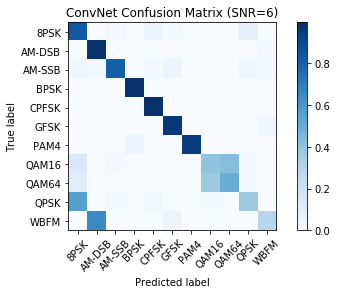

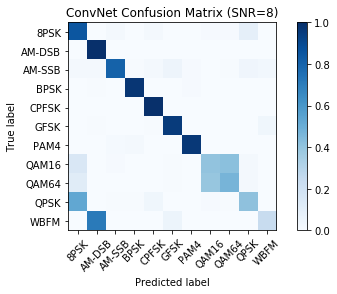

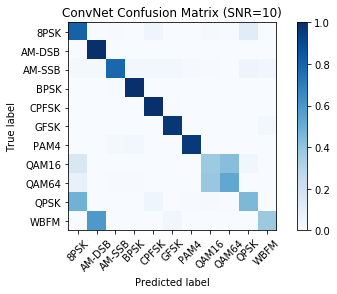

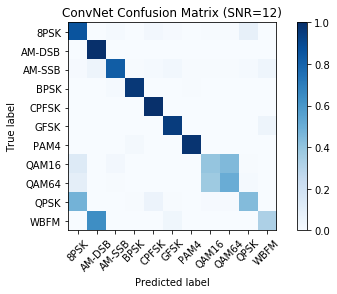

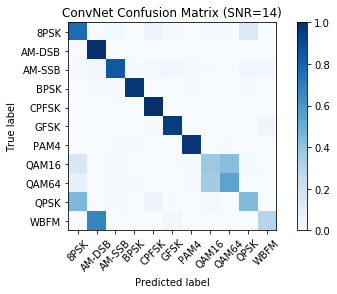

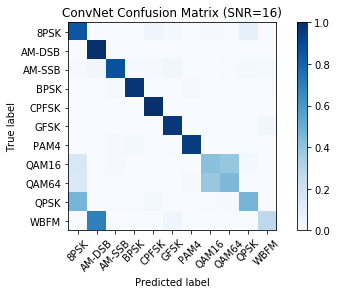

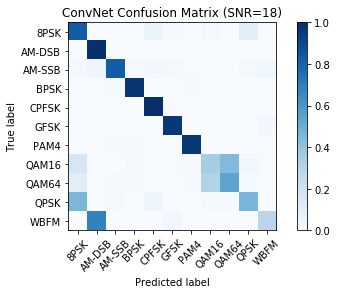

In [ ]:
acc = {}
lbl_snr = np.array(lbl_snr)
for snr in snrs:

    # extract classes @ SNR
    test_snr= lbl_snr[X_test_i]

    test_X_i = X_test[np.where(test_snr==snr)]
    test_Y_i = y_test[np.where(test_snr==snr)]  
    
    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(mods),len(mods)])
    confnorm = np.zeros([len(mods),len(mods)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(mods)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=mods, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)


In [ ]:
test_Y_i_hat

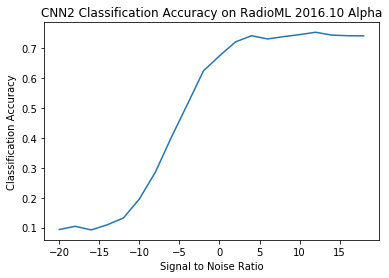

In [ ]:
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")
plt.savefig('acc.eps')